In [2]:
import csv
from datetime import datetime
import codecs
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd


In [3]:
with open('subdict.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    subdict = pickle.load(f)

y = np.array(list(subdict.values()))

lim = 10000
print("Total comments:",np.sum(y))
print("Total subs:",len(y))
print("Num comments: ",np.sum([i for i in y if i>lim]))
print("Num subs: ",np.sum(y>lim))

subs=[]
#Too many mod comments
remove = ['abortion','paypal','csci040temp','r4rasian','baltimoreanddcr4r','seattler4r']
#Not in English
not_english = ['brasilnoticias', 'brasilivre', 'mexico', 'de',
               'argentina', 'romania', 'quebec', 'brasil', 'portugal', 'italy', 'france', 'sweden',
              'indonesia','philippines','newsnepal']
RPAN = ['whereintheworld','theyoushow','distantsocializing','redditsessions']
total = 0
for sub in subdict.keys():
    if sub in remove:
        continue
    if sub in not_english:
        continue
    if sub in RPAN:
        continue
    if subdict[sub] > lim:
        subs.append(sub)
        total += subdict[sub]
subs = sorted(subs)
print(len(subs))
print(subs)

Total comments: 17777472
Total subs: 75465
Num comments:  10452673
Num subs:  275
250
['aboringdystopia', 'actualpublicfreakouts', 'advice', 'adviceanimals', 'agedlikemilk', 'airforce', 'alberta', 'ama', 'amcstock', 'amitheasshole', 'anarcho_capitalism', 'antiwork', 'anxiety', 'army', 'askaliberal', 'askanamerican', 'askdocs', 'askmen', 'asknyc', 'askreddit', 'askscience', 'askto', 'asktrumpsupporters', 'askuk', 'askwomen', 'atheism', 'ausfinance', 'austin', 'australia', 'australianpolitics', 'awfuleverything', 'aww', 'babybumps', 'badunitedkingdom', 'barstoolsports', 'baseball', 'bayarea', 'beyondthebump', 'blackpeopletwitter', 'blogsnark', 'boston', 'bravorealhousewives', 'brisbane', 'britishcolumbia', 'byebyejob', 'calgary', 'canada', 'canadacoronavirus', 'canadapolitics', 'casualconversation', 'centrist', 'cfb', 'changemyview', 'chicago', 'childfree', 'china_flu', 'christianity', 'collapse', 'collegebasketball', 'columbus', 'conservative', 'conspiracy', 'conspiracy_commons', 'coron

In [4]:
filename = "simplified.csv"

dates = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
         '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
         '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
         '2021-07', '2021-08', '2021-09', '2021-10']

longform = {}
i=0
for date in dates:
    for sub in subs:
        longform[sub+date] = []

with codecs.open(filename, 'rU', 'utf-8') as csvfile:
    datareader = csv.reader(csvfile)
    next(datareader)
    line = 0
    for row in datareader:
        try:
            sub = row[2]
        except:
            line += 1
            continue
            
        if sub not in subs:
            continue
        
        
        try:
            sent = float(row[4])
        except:
            sent = 0.0
        
        ts = int(row[3])
        date = datetime.utcfromtimestamp(ts).strftime('%Y-%m')
        
        longform[sub+date] = longform[sub+date] + [sent]
        
        if line % 10000 == 0:
            print(line,date,sub,sent,len(longform[sub+date]))


10000 2021-10 libertarian 0.7579 25
20000 2021-10 ukpolitics -0.4019 144
30000 2021-10 coronavirusdownunder -0.8779 633
40000 2021-10 askreddit -0.4754 946
50000 2021-10 antiwork 0.9932 1072
60000 2021-10 byebyejob -0.1531 253
70000 2021-10 coronavirusdownunder -0.8689 1102
100000 2021-10 antiwork -0.9396 1749
110000 2021-10 cringetopia -0.9302 124
150000 2021-10 facepalm 0.6249 1068
170000 2021-10 hermancainaward 0.0 6694
180000 2021-10 movies -0.4215 291
190000 2021-10 formula1 0.3939 345
260000 2021-10 baseball 0.0 225
280000 2021-10 europe 0.0591 557
290000 2021-10 murderedbywords -0.4939 507
300000 2021-10 alberta -0.8885 491
310000 2021-10 funny -0.7906 6260
320000 2021-10 politics -0.0772 3155
350000 2021-10 legaladvice -0.9931 205
360000 2021-10 leopardsatemyface -0.5875 1241
370000 2021-10 ontario 0.2973 1759
380000 2021-10 sacramento -0.1614 305
400000 2021-10 washingtondc -0.5522 281
420000 2021-10 publicfreakout -0.9368 2484
440000 2021-10 intellectualdarkweb -0.8413 656
45

3420000 2021-07 sydney 0.4118 26
3430000 2021-07 leopardsatemyface -0.1531 291
3440000 2021-07 wallstreetbets -0.481 266
3460000 2021-07 coronavirusdownunder 0.6497 512
3470000 2021-07 northernireland 0.0 91
3510000 2021-07 lockdownsceptics -0.9441 196
3520000 2021-07 vancouver -0.3182 199
3560000 2021-07 nonewnormal 0.0 4413
3570000 2021-07 facepalm -0.3843 801
3600000 2021-07 coronavirusus 0.0 690
3610000 2021-07 conservative 0.6199 1437
3620000 2021-07 conspiracy -0.7855 7445
3650000 2021-07 todayilearned 0.0 194
3680000 2021-07 coronavirus 0.0762 7866
3700000 2021-07 nfl 0.4588 1455
3710000 2021-07 nyc -0.868 737
3740000 2021-07 whitepeopletwitter 0.5267 1424
3750000 2021-07 conspiracy 0.738 11753
3760000 2021-07 weddingplanning 0.8519 447
3780000 2021-07 nonewnormal 0.3094 11457
3800000 2021-07 lockdownsceptics -0.3251 796
3820000 2021-07 memes -0.128 1362
3830000 2021-07 askreddit 0.5106 8700
3840000 2021-07 joerogan -0.7725 1493
3850000 2021-07 austin 0.0 1807
3860000 2021-07 po

7470000 2021-03 conservative 0.5856 5825
7480000 2021-03 pics 0.9606 2907
7490000 2021-03 britishcolumbia 0.9227 410
7500000 2021-03 squaredcircle -0.0516 2201
7520000 2021-03 newzealand 0.361 1883
7530000 2021-02 ivermectin -0.5781 1
7550000 2021-02 pics -0.5145 182
7600000 2021-02 covidlonghaulers 0.7479 262
7610000 2021-02 askanamerican 0.2846 97
7620000 2021-02 malaysia 0.0 77
7630000 2021-02 toronto -0.8995 324
7680000 2021-02 australia -0.9316 215
7690000 2021-02 joerogan -0.9803 192
7700000 2021-02 coronavirus -0.4703 5038
7710000 2021-02 thebachelor 0.6902 211
7740000 2021-02 teachers 0.3187 400
7750000 2021-02 formula1 -0.2541 195
7800000 2021-02 moderatepolitics -0.5518 198
7810000 2021-02 trueoffmychest 0.2323 489
7820000 2021-02 pennystocks 0.4767 418
7830000 2021-02 conspiracy -0.6124 5351
7920000 2021-02 mma 0.3382 524
7930000 2021-02 politics 0.0 10193
7940000 2021-02 cricket 0.3182 657
7970000 2021-02 cricket 0.5061 773
8010000 2021-02 coronavirus 0.209 13581
8020000 20

11260000 2020-10 coronavirusuk 0.7474 2
11280000 2020-10 teenagers -0.6482 80
11310000 2020-10 michigan 0.69 90
11330000 2020-10 newjersey 0.9975 42
11340000 2020-10 army -0.7003 64
11350000 2020-10 conspiracy -0.128 1329
11370000 2020-10 askmen 0.9488 159
11390000 2020-10 conspiracy 0.2023 1784
11400000 2020-10 maryland -0.6131 128
11410000 2020-10 memes -0.5267 869
11420000 2020-10 politics -0.4417 8581
11430000 2020-10 conservative 0.8319 1222
11440000 2020-10 politics -0.6249 9899
11470000 2020-10 moderatepolitics 0.4404 422
11480000 2020-10 barstoolsports 0.4497 371
11490000 2020-10 sandiego 0.9185 137
11500000 2020-10 nonewnormal -0.5299 1546
11510000 2020-10 melbourne -0.7615 1036
11520000 2020-10 coronavirusuk -0.7845 1647
11530000 2020-10 ohio -0.3134 85
11540000 2020-10 lifeprotips 0.7546 272
11560000 2020-10 seattlewa 0.7906 184
11570000 2020-10 news 0.91 5617
11610000 2020-10 coronavirusuk -0.9373 2399
11640000 2020-10 seattlewa -0.5994 256
11660000 2020-10 canada -0.8679 1

14990000 2020-06 michigan -0.7418 275
15020000 2020-06 unitedkingdom 0.8214 535
15030000 2020-06 investing 0.5122 578
15040000 2020-06 politicalcompassmemes -0.9168 280
15060000 2020-06 politics 0.7559 9966
15070000 2020-06 portland -0.782 800
15080000 2020-06 coronavirus -0.5994 12324
15090000 2020-06 publicfreakout -0.7717 1815
15130000 2020-06 unpopularopinion -0.2144 1292
15150000 2020-06 nba 0.0 1682
15170000 2020-06 insanepeoplefacebook 0.8008 1144
15230000 2020-06 gifs 0.0 880
15240000 2020-06 coronavirus -0.8431 19019
15270000 2020-06 coronavirus 0.0772 20247
15290000 2020-06 lockdownskepticism -0.5095 3724
15310000 2020-06 ama -0.3783 489
15340000 2020-06 funny 0.4215 1994
15350000 2020-06 gifs -0.6124 2187
15360000 2020-06 lifeprotips -0.0284 319
15400000 2020-06 singapore 0.5209 2050
15410000 2020-06 amitheasshole 0.8465 6415
15420000 2020-06 casualconversation 0.957 609
15430000 2020-06 pics -0.9707 7727
15450000 2020-06 coronavirus -0.434 26476
15460000 2020-06 coronavirus

KeyError: 'baseball2019-10'

In [5]:
with open("sub_time_series.pickle","wb") as f:
    pickle.dump(longform,f)

In [6]:
with open("SubsForClustering.pickle","wb") as f:
    pickle.dump(subs,f)

In [84]:
dat = []
df = []

for sub in subs:
    if subdict[sub] < lim:
        continue
    if sub in remove:
        continue
    pos_ratio = pos[sub]/subdict[sub]
    neg_ratio = neg[sub]/subdict[sub]
    neu_ratio = neutral[sub]/subdict[sub]
    dat.append([pos_ratio,neg_ratio,neu_ratio])
    df.append([pos_ratio,neg_ratio,neu_ratio,sub])

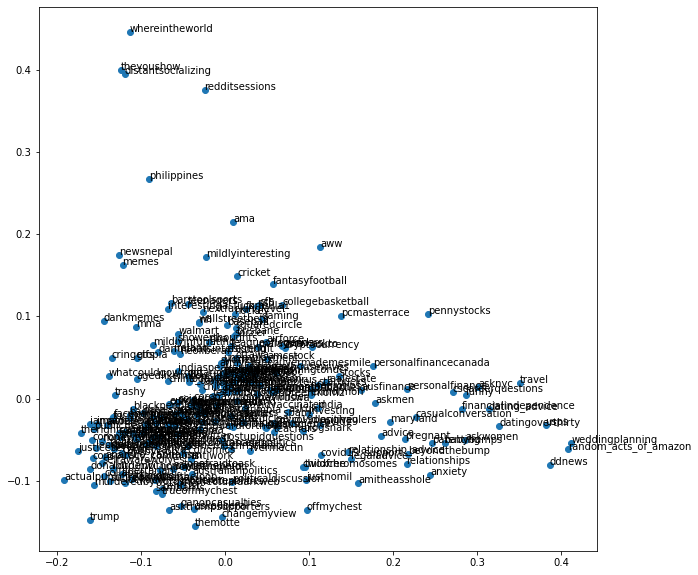

In [85]:
plt.figure(figsize=(10,10))
pca = PCA(n_components=2)
x_pca = pca.fit(dat).transform(dat)
x = [i[0] for i in x_pca]
y = [i[1] for i in x_pca]
plt.scatter(x,y,label=subs)

for i, txt in enumerate(subs[:len(x)]):
    label = txt #+' '+ [str(j)[2:4]for j in dat[i]][0] + [str(j)[2:4]for j in dat[i]][1] + [str(j)[2:4]for j in dat[i]][2]
    plt.annotate(label, (x[i], y[i]))

In [73]:
print(subs[np.argmax(y)])

whereintheworld


In [79]:

df2 = pd.DataFrame.from_records(df,columns=['Positive', 'Negative', 'Neutral','Name'])
fig = px.scatter_ternary(df2, a="Positive", b="Negative", c="Neutral",hover_data=["Name"])
fig.show()

In [80]:
neus = []
for sub in subs:
    neus.append(pos[sub]/subdict[sub])
print([x for _, x in sorted(zip(neus, subs))])

['theyoushow', 'whereintheworld', 'distantsocializing', 'actualpublicfreakouts', 'dankmemes', 'newsnepal', 'therightcantmeme', 'justiceserved', 'memes', 'iamatotalpieceofshit', 'publicfreakout', 'philippines', 'coronaviruscirclejerk', 'insanepeoplefacebook', 'cringetopia', 'whatcouldgowrong', 'conspiracy_commons', 'donaldtrump', 'leopardsatemyface', 'nonewnormal', 'awfuleverything', 'murderedbywords', 'trashy', 'selfawarewolves', 'trump', 'fuckyoukaren', 'facepalm', 'anarcho_capitalism', 'politicalhumor', 'mma', 'collapse', 'qult_headquarters', 'covidiots', 'politicalcompassmemes', 'hermancainaward', 'conspiracy', 'gifs', 'louderwithcrowder', 'news', 'subredditdrama', 'vaxxhappened', 'agedlikemilk', 'badunitedkingdom', 'conservative', 'nottheonion', 'blackpeopletwitter', 'redditsessions', 'byebyejob', 'libertarian', 'insaneparents', 'mildlyinfuriating', 'adviceanimals', 'lockdownskepticism', 'whitepeopletwitter', 'dataisbeautiful', 'damnthatsinteresting', 'interestingasfuck', 'stupidpo